**1) In this exercise, we will predict the number of applications received using the
other variables in the College data set in the ISLR2 package,
be sure to look closely at this data, you may want to consider the multi-scale
nature of the problem, and perhaps use a transformation on some of the
variables.**

**(a) Split the data set into a training set and a test set. Fit a linear model using least
squares on the training set, and report the test error obtained.**

In [1]:
library(ISLR2)
head(College)
dim(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


[1] 777  18

In [2]:
#Dividing test and training set
set.seed(131)
train_indis <- sample ( c ( 1 : length ( College [ , 1 ] ) ) , size = round ( 2 / 3 * length ( College [ , 1 ] ) ) , replace = FALSE )
train <- College[train_indis,]
test <- College[-train_indis,]

In [3]:
#Fitting a linear model using the least squares
lm.fit = lm(Apps~., data=train)
lm.pred = predict(lm.fit, new_data=test)
mean((test$Apps - lm.pred )^2)

[1] 26156692

**The test error of the linear model fit is 26156691.9724695**

**(b) Fit a ridge regression model on the training set, with λ chosen by crossvalidation. Report the test error obtained.**

In [10]:
install.packages("glmnet")
library(glmnet)
install.packages("caret")
library(caret)


The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpwnM9ZD/downloaded_packages


Loading required package: Matrix

Loaded glmnet 4.1-4




The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpwnM9ZD/downloaded_packages


Loading required package: ggplot2

Loading required package: lattice



In [11]:
set.seed(1)
#Set up matrices needed for the glmnet functions
train.matrix <- model.matrix(Apps~., data = train)[,-1]
test.matrix <- model.matrix(Apps~., data = test)[,-1]
#Choosing lambda using cross-validation
cv.out = cv.glmnet(train.matrix,train$Apps,alpha=0)
bestlamda = cv.out$lambda.min
bestlamda

[1] 387.8969

In [12]:
#Fit a ridge regression
ridge.model <- glmnet(train.matrix, train$Apps , alpha = 0, lambda = bestlamda)
#Make predictions
ridge.prediction <- predict(ridge.model, s=bestlamda, newx = test.matrix)
#Calculate test error
mean((ridge.prediction - test$Apps)^2)

[1] 1103235

**The test error of the ridge regression model fit with a lambda chosen by cross-validation is 1103234.71890016, which is lower than the linear model test error.**

**(d) Fit a lasso model on the training set, with λ chosen by cross-validation.
Report the test error obtained, along with the number of non-zero coefficient
estimates.**

In [13]:
#Choosing lambda using cross-validation
set.seed(121)
cv.out2 = cv.glmnet(train.matrix, train$Apps,alpha=1)
bestlamda2 = cv.out2$lambda.min
paste("Lamda value :" , bestlamda2)
#Fit a lasso model 
lasso.model = glmnet(train.matrix, train$Apps, alpha = 1, lambda = bestlamda2)
#make predictions
lasso.prediction = predict(lasso.model , s = bestlamda2 , newx = test.matrix)
#calculating test error
paste("Test Error :", mean((lasso.prediction - test$Apps)^2))

[1] "Lamda value : 30.740164887518"

[1] "Test Error : 1161347.5196992"

**The test error of the lasso model fit with a lambda chosen by cross-validation is 1161347.5196992, which is higher than the ridge regression test error but lower the linear model test error.**

**Lasso Non Zero Coefficients**

In [15]:
#Retrieving the lasso coefficients
lasscoefficients = predict(lasso.model, type="coefficients", s = bestlamda2 )[1:length(lasso.model$beta),]
#Printing non zero coefficients
lasscoefficients[lasscoefficients!=0]

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-452.01901445 -331.09576606    1.50484177   -0.33577443   31.26883425 
     Outstate    Room.Board         Books           PhD        Expend 
  -0.04627690    0.05365779    0.24960693   -5.38799025    0.04104100

**(g) Comment more generally on the results obtained. How accurately can we
predict the number of college applications received? Is there much difference
among the test errors resulting from these three approaches?**

**The model performance from best to worst is as follows (based upon test error):**
- **Ridge Regression (1103234.71890016)**, 
- **Lasso model (1161347.5196992)**
- **linear model (26156691.9724695).**

The test errors of Ridge Regression and lasso are fairly similary to one another, while Linear model performs significantly worse.

In [16]:
#Accuracy of prediction of the number of applications received, through ridge regression R-square value.
totalSumOFSquares = sum((mean(test$Apps) - test$Apps)^2)
totalSumOfResidualSquares = sum((ridge.prediction - test$Apps)^2)
1 - (totalSumOfResidualSquares)/(totalSumOFSquares)

[1] 0.905466

**The R-squared for ridge regression explains 90.5% of the variance in Apps using this model.**

**2) The insurance company benchmark data set gives information on customers.
Specifically, it contains 86 variables on product-usage data and socio-demographic
data derived from zip area codes. There are 5,822 customers in the training set and
another 4,000 in the test set. The data were collected to answer the following
questions: Can you predict who will be interested in buying a caravan insurance
policy and give an explanation why? Compute the OLS estimates and compare
them with those obtained from the following variable-selection algorithms:
Forwards Selection, Backwards Selection, Lasso regression, and Ridge regression.
What methods performed the best in the prediction?**

In [17]:
df = read.table('ticdata2000.txt',sep="\t")
test_df = read.table('ticeval2000.txt', sep = '\t')
test_y = read.table('tictgts2000.txt', sep = '\t')
test_df = cbind(test_df,test_y)
dim(test_df)
colnames(df) = colnames(Caravan)
colnames(test_df) = colnames(Caravan)
head(test_df)

[1] 4000   86

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,1,0,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,0,0,0,1,0,0,0,0,0,1
3,39,1,3,3,9,1,4,2,3,5,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,1,0,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,2,0,0,0,0,0,0


In [70]:
#Linear Regression 
linearRegression = lm(Purchase~. , data = df)
predict_df = predict(linearRegression , test_df )
test_error <- sum((test_df$Purchase - predict_df)^2) 
mean_squared_error <- test_error/nrow(test_df)

paste("Residual sum of squares error :", test_error)
paste("Mean Squared error :", mean_squared_error)

[1] "Residual sum of squares error : 215.94001421499"

[1] "Mean Squared error : 0.0539850035537474"

# Variable-Selection Algorithms:
# Forward Selection:

In [71]:
install.packages("leaps")
library(leaps)


The downloaded binary packages are in
	/var/folders/55/bmv00p010454k7lg69139c0w0000gn/T//RtmpwnM9ZD/downloaded_packages


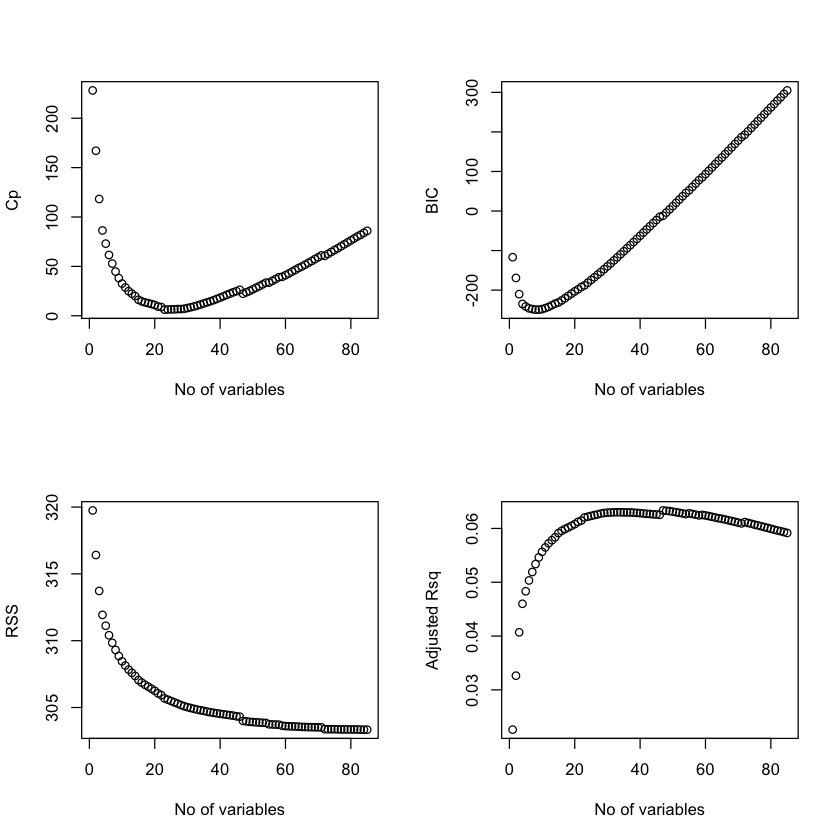

In [72]:
regfit.fwd <- regsubsets(Purchase~., data=df, nbest=1, nvmax=85 , method="forward")
my_sum_forward <-summary(regfit.fwd)
predict.regsubsets= function(object, newdata, id){
    form = as.formula(object$call[[2]])
    mat= model.matrix(form,newdata)
    coefi= coef(object,id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

train_err_store_fwd <- matrix(rep(NA,85))
test_err_store_fwd <- matrix(rep(NA,85))

for (i in 1:85){
    y_hat_train= predict(regfit.fwd, newdata = df, id = i )
    y_hat_test= predict.regsubsets(regfit.fwd, newdata = test_df, id=i )
    train_err_store_fwd[i] = (1/length(df))*sum((df$Purchase - y_hat_train)^2)
    test_err_store_fwd[i] = (1/length(test_df))*sum((test_df$Purchase - y_hat_test)^2)
}


par(mfrow=c(2,2))
plot(my_sum_forward$cp, xlab="No of variables", ylab="Cp")
plot(my_sum_forward$bic, xlab="No of variables", ylab="BIC")
plot(my_sum_forward$rss, xlab="No of variables", ylab="RSS")
plot(my_sum_forward$adjr2, xlab="No of variables", ylab="Adjusted Rsq")

In [73]:
which(my_sum_forward$cp==min(my_sum_forward$cp))
which(my_sum_forward$bic==min(my_sum_forward$bic))
which(my_sum_forward$rss==min(my_sum_forward$rss))
which(my_sum_forward$adjr2==max(my_sum_forward$sdjr2))

[1] 23

[1] 8

[1] 85

integer(0)

In [74]:
min_fwd <- which ( test_err_store_fwd == min ( test_err_store_fwd ) )
paste ("Least Test error stored in Forward Subset Selection : " ,test_err_store_fwd[min_fwd])

[1] "Least Test error stored in Forward Subset Selection :  2.50490759465683"

# Backward Selection : 

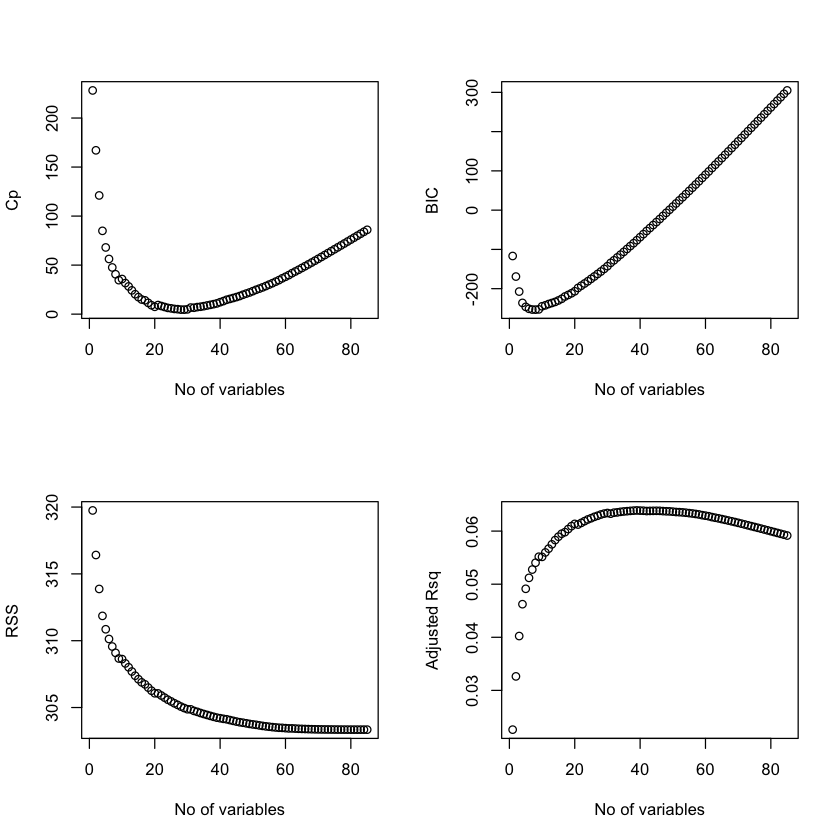

In [51]:
regfit.bwd <- regsubsets(Purchase~., data=df, nbest=1, nvmax=85 , method="backward")
my_sum_backward <-summary(regfit.bwd)
predict.regsubsets= function(object, newdata, id){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form,newdata)
    coefi = coef(object,id=id)
    xvars =names(coefi)
    mat[,xvars] %*% coefi
}

train_err_store_bwd <- matrix(rep(NA,85))
test_err_store_bwd <- matrix(rep(NA,85))
for (i in 1:85){
    y_hat_train = predict(regfit.bwd, newdata = df, id = i )
    y_hat_test = predict.regsubsets(regfit.bwd, newdata = test_df, id = i )
    train_err_store_bwd[i] = (1/length(test_df))*sum((df$Purchase - y_hat_train)^2)
    test_err_store_bwd[i] = (1/length(test_df))*sum((test_df$Purchase - y_hat_test)^2)
}

par(mfrow=c(2,2))
plot(my_sum_backward$cp, xlab="No of variables", ylab="Cp")
plot(my_sum_backward$bic, xlab="No of variables", ylab="BIC")
plot(my_sum_backward$rss, xlab="No of variables", ylab="RSS")
plot(my_sum_backward$adjr2, xlab="No of variables", ylab="Adjusted Rsq")

In [52]:
which(my_sum_backward$cp==min(my_sum_backward$cp))
which(my_sum_backward$bic==min(my_sum_backward$bic))
which(my_sum_backward$rss==min(my_sum_backward$rss))
which(my_sum_backward$adjr2==max(my_sum_backward$sdjr2))

[1] 29

[1] 8

[1] 85

integer(0)

In [65]:
min_bwd <- which ( test_err_store_bwd == min ( test_err_store_bwd ) )
paste ("Least Test error stored in Backward Subset Selection : " ,test_err_store_bwd[min_bwd])

[1] "Least Test error stored in Backward Subset Selection :  2.50417000894242"

# Lasso Regression: 

In [468]:
set.seed(100)
X_train <- df[,c(1:85)]
y_train <- df[,c(86)]
lasso.mod <- glmnet(X_train,y_train, alpha = 1)
cv.out6 = cv.glmnet(as.matrix(X_train), y_train, alpha = 1)
bestlamda6 = cv.out$lambda.min
paste("Lamda Value :",bestlamda6)
lasso.pred <- predict(lasso.mod, s = bestlamda6, newx = as.matrix(test_df[,c(1:85)]), type = "response")
test_error_lasso <- sum((lasso.pred - test_df$Purchase)^2)  #sum of residual squares error
mean_squared_lasso <- test_error_lasso/nrow(test_df) #mean squared error
paste( "Mean Squared Error for Lasso Regression :" , mean_squared_lasso)

[1] "Lamda Value : 387.89688649899"

[1] "Mean Squared Error for Lasso Regression : 0.0559598246785594"

# Ridge Regression :

In [470]:
ridge.mod <- glmnet(X_train,y_train, alpha = 0 )
cv.out7 = cv.glmnet(as.matrix(X_train), y_train, alpha = 0 )
bestlamda7 = cv.out$lambda.min
paste("Lamda Value :",bestlamda7)
ridge.pred <- predict(ridge.mod, s = bestlamda7, newx = as.matrix(test_df[,c(1:85)]), type = "response")
test_error_ridge <- sum((ridge.pred - test_df$Purchase)^2)  #sum of residual squares error
mean_squared_ridge <- test_error_ridge/nrow(test_df) #mean squared error
paste( "Mean Squared Error for Ridge Regression :" , mean_squared_ridge)

[1] "Lamda Value : 387.89688649899"

[1] "Mean Squared Error for Ridge Regression : 0.0559598246785594"

**Yes, we can predict who will be interested in buying a caravan insurance
policy and give an explanation based on the model accuracy ,from the above results we can conclude that Linear, Ridge and Lasso regressions perform well compared to Forward and Backward Subset Selection.**

# 3
**Compare the classification performance of linear regression and k-nearest neighbor classification on the zipcode data.  In particular, consider only the 7’s and 9’s for this problem, and k =1, 3, 5, 7, 9, 11, 13, 15. Show the test error for each choice of k. Describe yourresults – are you surprised by the differences in performance?**

In [1]:
# Read in the training data
zip.train <- as.matrix(read.table(gzfile("zip.train.gz")))
y7or9 <- which(zip.train[, 1] == 7 | zip.train[, 1] == 9)
X.train <- zip.train[y7or9, -1]
y.train <- zip.train[y7or9, 1] == 7

# Read in the test data
zip.test <- as.matrix(read.table(gzfile("zip.test.gz")))
y7or9 <- which(zip.test[, 1] == 7 | zip.test[, 1] == 9)
X.test <- zip.test[y7or9, -1]
y.test <- zip.test[y7or9, 1] == 7


# Classification by linear regression
Lr <- lm(y.train ~ X.train)
Lr$coef[is.na(Lr$coef)] <- 1
yhat <- (cbind(1, X.test) %*% Lr$coef) >= 0.5
L.error <- mean(yhat != y.test)

# Classification by k-nearest neighbors
library(class)
k <- c(1, 3, 5, 7, 9, 11, 13, 15)
k.error <- rep(NA, length(k))
for (i in 1:length(k)) {
    yhat <- knn(X.train, X.test, y.train, k[i])
    k.error[i] <- mean(yhat != y.test)
}

paste("Linear Regression error rate :" , L.error)
for (i in 1:length(k.error)){
    print(paste("k-NN with k = ",k[i], ":", k.error[i]))
}

[1] "Linear Regression error rate : 0.453703703703704"

[1] "k-NN with k =  1 : 0.0246913580246914"
[1] "k-NN with k =  3 : 0.0246913580246914"
[1] "k-NN with k =  5 : 0.0246913580246914"
[1] "k-NN with k =  7 : 0.0277777777777778"
[1] "k-NN with k =  9 : 0.037037037037037"
[1] "k-NN with k =  11 : 0.0401234567901235"
[1] "k-NN with k =  13 : 0.0401234567901235"
[1] "k-NN with k =  15 : 0.037037037037037"
